<center> <h1>Fashion - MNIST</h1> </center>

#### What is the FMNIST?

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples

#### What is the training Model trying to predict?

The Model should understand the type of fashion object seen on a picture if given a picture of a 28x28 grayscale image of a Zalando's fashio article image.
The are 10 types of fashion objects, so ths is a multi-classifaction problem

### Feature description

we got the 2 diffrent tyes of features, the first represents pixels on the picture and the second says which type of fashion object it is

#### pixel1 - pixel784
each feature contain a number between 0 and 256 representing a color the grayscale, all pixel togheter make the whole picture of 28*28

#### Label
contains a number between 0 and 9 each representing of the following types of a fashion object

- T-shirt/top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle boot

The model will try to predict the label of each picture

## Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

## Get the Data

In [3]:
data_train_file = "csv folder/fashion-mnist_train.csv"
data_test_file = "csv folder/fashion-mnist_test.csv"

df_train = pd.read_csv(data_train_file)
df_test = pd.read_csv(data_test_file)

### First Look

In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print("Shape of the Train Set: ", df_train.shape)
print("Shape of the Test Set: ", df_test.shape)

Shape of the Train Set:  (60000, 785)
Shape of the Test Set:  (10000, 785)


Lets Check if the data set has any null values

In [6]:
df_train.isnull().sum().sum()

0

In [7]:
df_test.isnull().sum().sum()

0

Lets plot some of the pictures to see what we are working with

In [8]:
class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"]

#given an int in the range of 0 to 9 and return the name of that label
def get_label_cls(label):
    return class_table[label]

#example
get_label_cls(3)

'Dress'

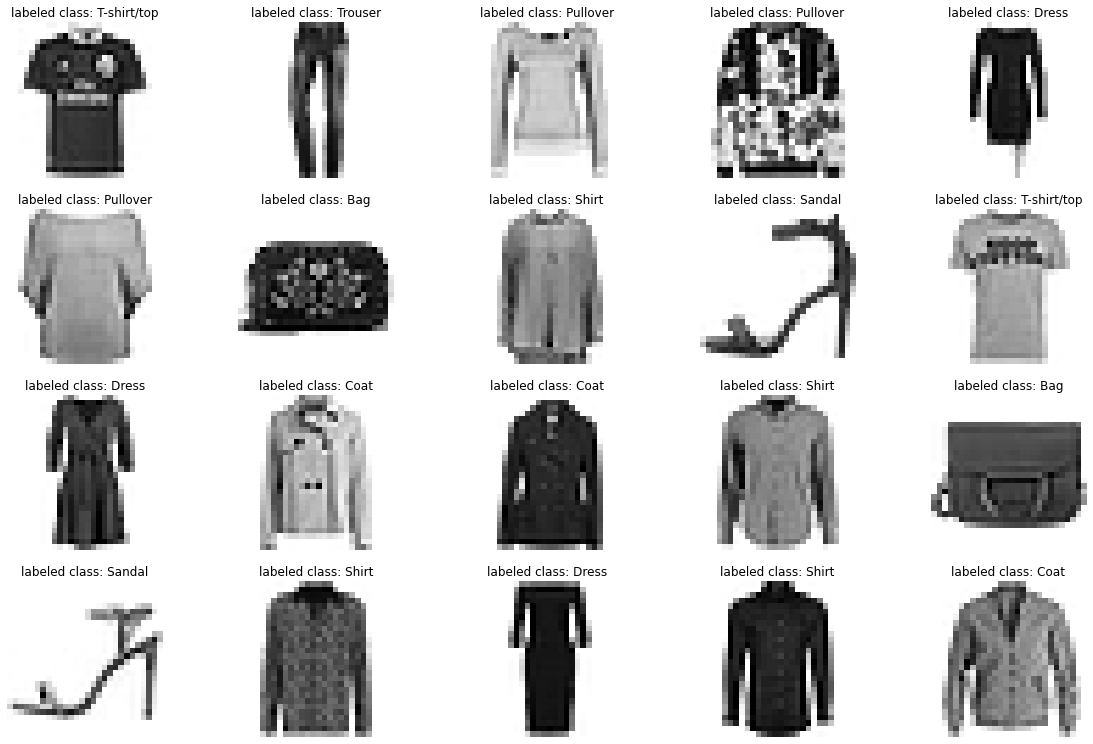

In [9]:
plt.figure(figsize=(20,20))
for i in range(20): 
    plt.subplot(6,5, i+1)
    sample = np.reshape(df_test[df_test.columns[1:]].iloc[i].values/255, (28,28))
    plt.axis('off')
    plt.title("labeled class: {}".format(get_label_cls(df_test["label"].iloc[i])))
    plt.imshow(sample, cmap=plt.cm.binary)

## Create a Test set

We will first compare the distrubtion of the Test and Training set to see if there is any bias.

Lets Strat with the distibution of training set:

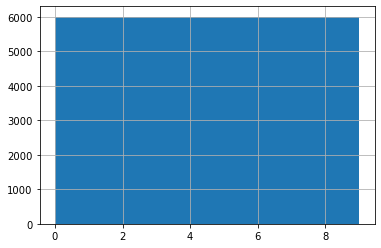

In [10]:
df_train['label'].hist()
plt.show()

The Data is Completely balanced!

And now we will make a comparison between the distrubtion of the training and test set

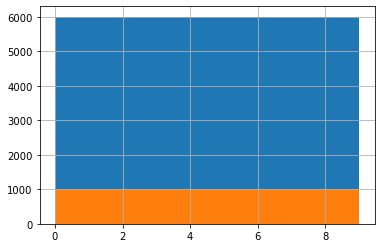

In [11]:
df_train['label'].hist()
df_test['label'].hist()
plt.show()

both have the same distribution, which means it is very balanced and we dont have to worry about a bias in the distribution.

The Data is alreday split between Test and train, so we only have to determine the X,Y

In [12]:
# Make a copy to avoid changing original data
TrainCopy = df_train.copy()
TestCopy = df_test.copy()

#split the Training set
X_train= TrainCopy.drop(["label"],axis =1)
y_train= TrainCopy["label"]

#split the Test set
X_test= TestCopy.drop(["label"],axis =1)
y_test= TestCopy["label"]

In [13]:
#A check to see that nothing went wrong
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 784)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 784)
Shape of y_test:  (10000,)


## Data Preprocessing

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

We only have numeric features, there no null values in the set and all features represent a pixel so no new feature to add. So the only preproccesing steps we can take are:

1. Scaling: The scaler will have to be a MinMaxScaler to normalize the data if we want to use PCA.
2. Pca: the number n_components will change arcoding to what the goal is (highest accuracy possible or highest accuracy possible with the a low amount of features/pixels/dimensions).
3. Clustering: we will go with K-Means and make 100 clusters.

We will create a 2 main pipelines, both will have no clustering build in

- Pca95: meaning for pca n_components=0.95.
- PCA49: meaning for pca n_components=49,49 features/dimensions.

i didnt add clustering because we dont know if it will help or not so for every training model i will make a pipeline with clustering to see the results.

##### Preprocessing Pipeline

In [15]:
#Pca - 0.95%: we will los only 5% of the data
PCA95 = Pipeline(steps=[
    ('scaler',MinMaxScaler()), 
    ('pca',PCA(n_components=0.95))])

#Pca - 49 n_components: we will turn the picture from 748 dimesions to 49 dimensions, form 28*28 to 7*7
PCA49 = Pipeline(steps=[
    ('scaler',MinMaxScaler()), 
    ('pca',PCA(n_components=49))])

##### Transforming the data

###### Pipeline: PCA95

In [16]:
# we will preprocess the data
X_train_transformed = PCA95.fit_transform(X_train)
X_test_transformed = PCA95.transform(X_test)
X_train_transformed

array([[ 3.68571599,  4.96088434, -0.05065857, ...,  0.03425133,
        -0.2177666 , -0.01856265],
       [-4.37652362,  3.86024446, -1.948038  , ..., -0.15241454,
        -0.28524276,  0.01230069],
       [ 7.26511378,  1.56887786,  2.31516324, ...,  0.08980214,
         0.01288154, -0.15642506],
       ...,
       [ 2.18171709,  0.45160091, -0.55613746, ..., -0.05673658,
        -0.10905813, -0.28895425],
       [ 1.46950676,  6.06358945, -0.6244239 , ..., -0.51104822,
         0.42540262, -0.26671481],
       [-3.57273496,  4.7715986 , -0.26523304, ..., -0.01269432,
        -0.07790681,  0.01997427]])

###### Pipeline: PCA49

In [17]:
# Make a copy to avoid changing original data
TrainCopy_49d = df_train.copy()
TestCopy_49d = df_test.copy()

#split the Training set
X_train_49d= TrainCopy_49d.drop(["label"],axis =1)
y_train_49d= TrainCopy_49d["label"]

#split the Test set
X_test_49d= TestCopy_49d.drop(["label"],axis =1)
y_test_49d= TestCopy_49d["label"]

In [18]:
# we will preprocess the data
X_train_transformed_49d = PCA49.fit_transform(X_train_49d)
X_test_transformed_49d = PCA49.transform(X_test_49d)
X_train_transformed_49d

array([[ 3.68571599,  4.96088434, -0.05065857, ...,  0.94566331,
         0.02439757,  0.08618657],
       [-4.37652362,  3.86024446, -1.948038  , ...,  0.39417834,
         0.57146017,  0.15699266],
       [ 7.26511378,  1.56887786,  2.31516324, ...,  0.2719184 ,
         0.15476864,  0.16124379],
       ...,
       [ 2.18171709,  0.45160091, -0.55613746, ..., -0.12433588,
        -0.27173498, -0.66265886],
       [ 1.46950676,  6.06358945, -0.6244239 , ...,  0.17787961,
         0.13084123,  0.33915798],
       [-3.57273496,  4.7715986 , -0.26523304, ..., -0.9987753 ,
        -0.38908009,  0.04987442]])

## Model exploration
Lets Look at the difrence of the picture before and after pca

## Model training

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

###### Before you Contuine:
Each Classifier has at the end a small dataframe with all the accuracy scores for all the pipelines used in addition after Model training is **Model evaluation** which has all results of **Model training** in an orderly manner.

**Model training** is at the end of this notebook

### KNN

##### First Look: Without touching the data at all
I have to do at least one run without any changes to see if i even have time for a gridsearch.

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      1000
           1       0.99      0.97      0.98      1000
           2       0.74      0.82      0.78      1000
           3       0.91      0.87      0.89      1000
           4       0.81      0.77      0.79      1000
           5       0.99      0.82      0.90      1000
           6       0.68      0.59      0.63      1000
           7       0.88      0.94      0.91      1000
           8       0.98      0.95      0.97      1000
           9       0.88      0.97      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

Accuracy:  0.8584


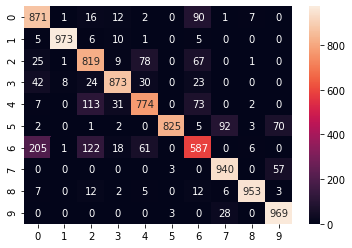

In [24]:
#fit the model
Knn = KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train,y_train)

#make predictions
Predic_Knn = Knn.predict(X_test)

#evaluate predictions
confmat = confusion_matrix(y_test, Predic_Knn)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, Predic_Knn)
acc_score1 = accuracy_score(y_test, Predic_Knn)
print(class_rep1)
print("Accuracy: ", acc_score1)

In [25]:
Clustering = Pipeline([
    ("kmeans", KMeans(n_clusters=100, random_state=42)),
    ("Knn", KNeighborsClassifier(n_neighbors=3)),])
Clustering.fit(X_train, y_train)
Clustering_score = Clustering.score(X_test, y_test)
print("Accuracy: ", Clustering_score)

Accuracy:  0.8003


##### PCA95 - n_components=0.95

In [22]:
Knn = KNeighborsClassifier(n_neighbors=3)
Knn.fit(X_train_transformed,y_train)
Knn_score =  Knn.score(X_test_transformed,y_test)
print("Accuracy of PCA95 without clustering: ",Knn_score)

Knn_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                    ("Knn", KNeighborsClassifier(n_neighbors=3)),])
Knn_pipe.fit(X_train_transformed, y_train)
Knn_pipe_score = Knn_pipe.score(X_test_transformed, y_test)
print("Accuracy of PCA95 with clustering: ",Knn_pipe_score)

Accuracy of PCA95 without clustering:  0.8652
Accuracy of PCA95 with clustering:  0.7983


##### PCA49 - 49 dimensions

In [21]:
Knn_49d = KNeighborsClassifier(n_neighbors=3)
Knn_49d.fit(X_train_transformed_49d,y_train)
Knn_49d_score=Knn_49d.score(X_test_transformed_49d,y_test)
print("Accuracy of PCA49 without clustering: ", Knn_49d_score)

Knn_49d_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                    ("Knn", KNeighborsClassifier(n_neighbors=3)),])
Knn_49d_pipe.fit(X_train_transformed_49d, y_train)
Knn_49d_pipe_score=Knn_49d_pipe.score(X_test_transformed_49d, y_test)
print("Accuracy of PCA49 with clustering: ", Knn_49d_pipe_score)

Accuracy of PCA49 without clustering:  0.8561
Accuracy of PCA49 with clustering:  0.7968


##### Clasifier evaluation

In [26]:
KnnScores = pd.DataFrame({
    'Model':['KNeighborsClassifier'],
    'PCA95':[Knn_score],
    'PCA49':[Knn_49d_score],
    'Clean':[acc_score1],
    'PCA95 & K-Means':[Knn_pipe_score],
    'PCA49 & K-Means':[Knn_49d_pipe_score],
    'Clean & K-Means':[Clustering_score]})
KnnScores

,Model,PCA95,PCA49,Clean,PCA95 & K-Means,PCA49 & K-Means,Clean & K-Means
0,KNeighborsClassifier,0.8652,0.8561,0.8584,0.7983,0.7968,0.8003


## Logistic Regression

##### PCA95 - n_components=0.95

In [47]:
logR = LogisticRegression(random_state=42, n_jobs=-1)
logR.fit(X_train_transformed,y_train)
logR_score =  logR.score(X_test_transformed,y_test)
print("Accuracy of PCA95 without clustering: ",logR_score)

logR_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                    ("Logistic Regression", LogisticRegression(random_state=42, n_jobs=-1)),])
logR_pipe.fit(X_train_transformed, y_train)
logR_pipe_score = logR_pipe.score(X_test_transformed, y_test)
print("Accuracy of PCA95 with clustering: ",logR_pipe_score)

Accuracy of PCA95 without clustering:  0.8554
Accuracy of PCA95 with clustering:  0.7621


##### PCA49 - 49 dimensions

In [48]:
logR_49d = LogisticRegression(random_state=42, n_jobs=-1)
logR_49d.fit(X_train_transformed_49d,y_train)
logR_49d_score=logR_49d.score(X_test_transformed_49d,y_test)
print("Accuracy of PCA49 without clustering: ", logR_49d_score)

logR_49d_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                    ("Logistic Regression", LogisticRegression(random_state=42, n_jobs=-1)),])
logR_49d_pipe.fit(X_train_transformed_49d, y_train)
logR_49d_pipe_score=logR_49d_pipe.score(X_test_transformed_49d, y_test)
print("Accuracy of PCA49 with clustering: ", logR_49d_pipe_score)

Accuracy of PCA49 without clustering:  0.8419
Accuracy of PCA49 with clustering:  0.7684


##### Clasifier evaluation

In [63]:
logRScores = pd.DataFrame({
    'Model':['LogisticRegressionClassifier'],
    'PCA95':[logR_score],
    'PCA49':[logR_49d_score],
    'PCA95 & K-Means':[logR_pipe_score],
    'PCA49 & K-Means':[logR_49d_pipe_score]})
logRScores

,Model,PCA95,PCA49,PCA95 & K-Means,PCA49 & K-Means
0,LogisticRegressionClassifier,0.8554,0.8419,0.7621,0.7684


### Desicion Trees

##### PCA95 - n_components=0.95

In [28]:
dTree = DecisionTreeClassifier(random_state=42)
dTree.fit(X_train_transformed,y_train)
dTree_score =  dTree.score(X_test_transformed,y_test)
print("Accuracy of PCA95 without clustering: ",dTree_score)

dTree_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                    ("Desicion Tree", DecisionTreeClassifier(random_state=42)),])
dTree_pipe.fit(X_train_transformed, y_train)
dTree_pipe_score = dTree_pipe.score(X_test_transformed, y_test)
print("Accuracy of PCA95 with clustering: ",dTree_pipe_score)

Accuracy of PCA95 without clustering:  0.7664
Accuracy of PCA95 with clustering:  0.7558


##### PCA49 - 49 dimensions

In [37]:
dTree_49d = DecisionTreeClassifier(random_state=42)
dTree_49d.fit(X_train_transformed_49d,y_train)
dTree_49d_score=dTree_49d.score(X_test_transformed_49d,y_test)
print("Accuracy of PCA49 without clustering: ", dTree_49d_score)

dTree_49d_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                    ("Desicion Tree", DecisionTreeClassifier(random_state=42)),])
dTree_49d_pipe.fit(X_train_transformed_49d, y_train)
dTree_49d_pipe_score=dTree_49d_pipe.score(X_test_transformed_49d, y_test)
print("Accuracy of PCA49 with clustering: ", dTree_49d_pipe_score)

Accuracy of PCA49 without clustering:  0.7766
Accuracy of PCA49 with clustering:  0.7523


##### Clasifier evaluation

In [33]:
dTreeScores = pd.DataFrame({
    'Model':['DecisionTreeClassifier'],
    'PCA95':[dTree_score],
    'PCA49':[dTree_49d_score],
    'PCA95 & K-Means':[dTree_pipe_score],
    'PCA49 & K-Means':[dTree_49d_pipe_score]})
dTreeScores

,Model,PCA95,PCA49,PCA95 & K-Means,PCA49 & K-Means
0,DecisionTreeClassifier,0.7664,0.7766,0.7558,0.7523


### Random Forest

##### PCA95 - n_components=0.95

In [38]:
RFor = RandomForestClassifier(random_state=42)
RFor.fit(X_train_transformed,y_train)
RFor_score =  RFor.score(X_test_transformed,y_test)
print("Accuracy of PCA95 without clustering: ",RFor_score)

RFor_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                    ("Random Forest", RandomForestClassifier(random_state=42)),])
RFor_pipe.fit(X_train_transformed, y_train)
RFor_pipe_score = RFor_pipe.score(X_test_transformed, y_test)
print("Accuracy of PCA95 with clustering: ",RFor_pipe_score)

Accuracy of PCA95 without clustering:  0.8648
Accuracy of PCA95 with clustering:  0.822


##### PCA49 - 49 dimensions

In [39]:
RFor_49d = RandomForestClassifier(random_state=42)
RFor_49d.fit(X_train_transformed_49d,y_train)
RFor_49d_score=RFor_49d.score(X_test_transformed_49d,y_test)
print("Accuracy of PCA49 without clustering: ", RFor_49d_score)

RFor_49d_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                    ("Random Forest", RandomForestClassifier(random_state=42)),])
RFor_49d_pipe.fit(X_train_transformed_49d, y_train)
RFor_49d_pipe_score=RFor_49d_pipe.score(X_test_transformed_49d, y_test)
print("Accuracy of PCA49 with clustering: ", RFor_49d_pipe_score)

Accuracy of PCA49 without clustering:  0.8679
Accuracy of PCA49 with clustering:  0.8137


##### Clasifier evaluation

In [62]:
RForScores = pd.DataFrame({
    'Model':['RandomForestClassifier'],
    'PCA95':[RFor_score],
    'PCA49':[RFor_49d_score],
    'PCA95 & K-Means':[RFor_pipe_score],
    'PCA49 & K-Means':[RFor_49d_pipe_score]})
RForScores

,Model,PCA95,PCA49,PCA95 & K-Means,PCA49 & K-Means
0,RandomForestClassifier,0.8648,0.8679,0.822,0.8137


### Gradient boosting

##### PCA95 - n_components=0.95

In [41]:
gradB = GradientBoostingClassifier(random_state=42)
gradB.fit(X_train_transformed,y_train)
gradB_score =  gradB.score(X_test_transformed,y_test)
print("Accuracy of PCA95 without clustering: ",gradB_score)

gradB_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                    ("Gradient boosting",GradientBoostingClassifier(random_state=42)),])
gradB_pipe.fit(X_train_transformed, y_train)
gradB_pipe_score = gradB_pipe.score(X_test_transformed, y_test)
print("Accuracy of PCA95 with clustering: ",gradB_pipe_score)

Accuracy of PCA95 without clustering:  0.8498
Accuracy of PCA95 with clustering:  0.8088


##### PCA49 - 49 dimensions

In [42]:
gradB_49d = GradientBoostingClassifier(random_state=42)
gradB_49d.fit(X_train_transformed_49d,y_train)
gradB_49d_score=gradB_49d.score(X_test_transformed_49d,y_test)
print("Accuracy of PCA49 without clustering: ", gradB_49d_score)

gradB_49d_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                      ("Gradient boosting",GradientBoostingClassifier(random_state=42)),])
gradB_49d_pipe.fit(X_train_transformed_49d, y_train)
gradB_49d_pipe_score=gradB_49d_pipe.score(X_test_transformed_49d, y_test)
print("Accuracy of PCA49 with clustering: ", gradB_49d_pipe_score)

Accuracy of PCA49 without clustering:  0.8491
Accuracy of PCA49 with clustering:  0.7933


##### Clasifier evaluation

In [61]:
gradBScores = pd.DataFrame({
    'Model':['GradientBoostClassifier'],
    'PCA95':[gradB_score],
    'PCA49':[gradB_49d_score],
    'PCA95 & K-Means':[gradB_pipe_score],
    'PCA49 & K-Means':[gradB_49d_pipe_score]})
gradBScores

,Model,PCA95,PCA49,PCA95 & K-Means,PCA49 & K-Means
0,GradientBoostClassifier,0.8498,0.8491,0.8088,0.7933


### Ada Boosting

##### PCA95 - n_components=0.95

In [55]:
adaB = AdaBoostClassifier(random_state=42)
adaB.fit(X_train_transformed,y_train)
adaB_score =  adaB.score(X_test_transformed,y_test)
print("Accuracy of PCA95 without clustering: ",adaB_score)

adaB_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                    ("Ada boosting",AdaBoostClassifier(random_state=42)),])
adaB_pipe.fit(X_train_transformed, y_train)
adaB_pipe_score = adaB_pipe.score(X_test_transformed, y_test)
print("Accuracy of PCA95 with clustering: ",adaB_pipe_score)

Accuracy of PCA95 without clustering:  0.4979
Accuracy of PCA95 with clustering:  0.4183


##### PCA49 - 49 dimensions

In [56]:
adaB_49d = AdaBoostClassifier(random_state=42)
adaB_49d.fit(X_train_transformed_49d,y_train)
adaB_49d_score=adaB_49d.score(X_test_transformed_49d,y_test)
print("Accuracy of PCA49 without clustering: ", adaB_49d_score)

adaB_49d_pipe = Pipeline([("kmeans", KMeans(n_clusters=100, random_state=42)),
                      ("Ada boosting",AdaBoostClassifier(random_state=42)),])
adaB_49d_pipe.fit(X_train_transformed_49d, y_train)
adaB_49d_pipe_score=adaB_49d_pipe.score(X_test_transformed_49d, y_test)
print("Accuracy of PCA49 with clustering: ", adaB_49d_pipe_score)

Accuracy of PCA49 without clustering:  0.5098
Accuracy of PCA49 with clustering:  0.4612


##### Clasifier evaluation

In [57]:
adaBScores = pd.DataFrame({
    'Model':['AdaBoostClassifier'],
    'PCA95':[adaB_score],
    'PCA49':[adaB_49d_score],
    'PCA95 & K-Means':[adaB_pipe_score],
    'PCA49 & K-Means':[adaB_49d_pipe_score]})
adaBScores

,Model,PCA95,PCA49,PCA95 & K-Means,PCA49 & K-Means
0,AdaBoostClassifier,0.4979,0.5098,0.4183,0.4612


I will remove the clustering, it never made the Model better but i wanted to see if for essembly it will be diffrent.
Gradient boosting showed that the clustering isnt helping so Xgboost wont be any diffrent and it will take to long.

### XG Boost

##### PCA95 - n_components=0.95

In [51]:
xgB = XGBClassifier(random_state=42,n_jobs=-1)
xgB.fit(X_train_transformed,y_train)
xgB_score =  xgB.score(X_test_transformed,y_test)
print("Accuracy of PCA95: ",xgB_score)

C:\Users\Inons\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:08:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of PCA95:  0.8843


##### PCA49 - 49 dimensions

In [52]:
xgB_49d = XGBClassifier(random_state=42,n_jobs=-1)
xgB_49d.fit(X_train_transformed_49d,y_train)
xgB_49d_score=xgB_49d.score(X_test_transformed_49d,y_test)
print("Accuracy of PCA49: ", xgB_49d_score)

[03:21:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of PCA49:  0.8788


##### Clasifier evaluation

In [59]:
xgB_pipe_score=0
xgB_49d_pipe_score=0
xgBScores = pd.DataFrame({
    'Model':['XGBoostClassifier'],
    'PCA95':[xgB_score],
    'PCA49':[xgB_49d_score],
    'PCA95 & K-Means':[xgB_pipe_score],
    'PCA49 & K-Means':[xgB_49d_pipe_score]})
xgBScores

,Model,PCA95,PCA49,PCA95 & K-Means,PCA49 & K-Means
0,XGBoostClassifier,0.8843,0.8788,0,0


### Stacking

##### PCA95 - n_components=0.95

In [ ]:
estimators=[
    ('Knn',Knn),
    ('Logistic Regression',logR),
    ('Random Forest',RFor),
    ('Gradient Boosting',gradB)]
Stk = StackingClassifier(estimators = estimators,final_estimator=xgB)
Stk.fit(X_train_transformed,y_train)

Stk_score =  Stk.score(X_test_transformed,y_test)
PredicStk = Stk.predict(X_test_transformed)
#evaluate predictions
confmat = confusion_matrix(y_test, PredicStk)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, PredicStk)
acc_score1 = accuracy_score(y_test, PredicStk)
print(class_rep1)
print("Accuracy of PCA95: ", acc_score1)

##### PCA49 - 49 dimensions

In [ ]:
estimators_49d=[
    ('Knn',Knn_49d),
    ('Logistic Regression',logR_49d),
    ('Random Forest',RFor_49d),
    ('Gradient Boosting',gradB_49d)]
Stk_49d = StackingClassifier(estimators = estimators_49d,final_estimator=xgB_49d)
Stk_49d.fit(X_train_transformed,y_train)

Stk_49d_score =  Stk_49d.score(X_test_transformed,y_test)
PredicStk_49d = Stk_49d.predict(X_test_transformed)
#evaluate predictions
confmat = confusion_matrix(y_test, PredicStk_49d)
sns.heatmap(confmat, annot = True, fmt = "d")
class_rep1 = classification_report(y_test, PredicStk_49d)
acc_score2 = accuracy_score(y_test, PredicStk_49d)
print(class_rep1)
print("Accuracy of PCA49: ", acc_score2)

##### Clasifier evaluation

In [ ]:
Stk_pipe_score=0
Stk_49d_pipe_score=0
StkScores = pd.DataFrame({
    'Model':['StackingClassifier'],
    'PCA95':[Stk_score],
    'PCA49':[Stk_49d_score],
    'PCA95 & K-Means':[Stk_pipe_score],
    'PCA49 & K-Means':[Stk_49d_pipe_score]})
StkScores

### Hard Voting

##### PCA95 - n_components=0.95

In [ ]:
estimators=[
    ('Knn',Knn),
    ('Logistic Regression',logR),
    ('Random Forest',RFor),
    ('Gradient Boosting',gradB),
    ('XG Boost', xgB)]
votHard = VotingClassifier(estimators=estimators, voting='hard')
votHard.fit(X_train_transformed,y_train)

votHard_score =  votHard.score(X_test_transformed,y_test)
PredicvotHard = votHard.predict(X_test_transformed)
print("Accuracy of PCA95: ", votHard_score)

##### PCA49 - 49 dimensions

In [ ]:
estimators_49d=[
    ('Knn',Knn_49d),
    ('Logistic Regression',logR_49d),
    ('Random Forest',RFor_49d),
    ('Gradient Boosting',gradB_49d),
    ('XG Boost', xgB_49d)]
votHard_49d = VotingClassifier(estimators=estimators_49d, voting='hard')
votHard_49d.fit(X_train_transformed,y_train)

votHard_49d_score =  votHard_49d.score(X_test_transformed,y_test)
PredicvotHard_49d = votHard_49d.predict(X_test_transformed)
print("Accuracy of PCA49: ", votHard_49d_score)

##### Clasifier evaluation

In [ ]:
votHard_pipe_score=0
votHard_49d_pipe_score=0
votHardScores = pd.DataFrame({
    'Model':['StackingClassifier'],
    'PCA95':[votHard_score],
    'PCA49':[votHard_49d_score],
    'PCA95 & K-Means':[votHard_pipe_score],
    'PCA49 & K-Means':[votHard_49d_pipe_score]})
votHardScores

### Soft Voting

##### PCA95 - n_components=0.95

In [ ]:
estimators=[
    ('Knn',Knn),
    ('Logistic Regression',logR),
    ('Random Forest',RFor),
    ('Gradient Boosting',gradB),
    ('XG Boost', xgB)]
votSoft = VotingClassifier(estimators=estimators, voting='soft')
votSoft.fit(X_train_transformed,y_train)

votSoft_score =  votSoft.score(X_test_transformed,y_test)
PredicvotSoft = votSoft.predict(X_test_transformed)
print("Accuracy of PCA49: ", votSoft_score)

##### PCA49 - 49 dimensions

In [ ]:
estimators_49d=[
    ('Knn',Knn_49d),
    ('Logistic Regression',logR_49d),
    ('Random Forest',RFor_49d),
    ('Gradient Boosting',gradB_49d),
    ('XG Boost', xgB_49d)]
votSoft_49d = VotingClassifier(estimators=estimators_49d, voting='soft')
votSoft_49d.fit(X_train_transformed,y_train)

votSoft_49d_score =  votSoft_49d.score(X_test_transformed,y_test)
PredicvotSoft = votSoft_49d.predict(X_test_transformed)
print("Accuracy of PCA49: ", votSoft_49d_score)

##### Clasifier evaluation

In [ ]:
votSoft_pipe_score=0
votSoft_49d_pipe_score=0
votSoftScores = pd.DataFrame({
    'Model':['StackingClassifier'],
    'PCA95':[votSoft_score],
    'PCA49':[votSoft_49d_score],
    'PCA95 & K-Means':[votSoft_pipe_score],
    'PCA49 & K-Means':[votSoft_49d_pipe_score]})
votSoftScores

## Model Evaluation

In [ ]:
Final_Scores = pd.DataFrame({
    'Model': ['SVC', 'KNeighborsClassifier', 'DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','GaussianNB'],
    'Score': [acc_score1, knn_score, dt_score, rf_score, ada_score, gau_score]})
models.sort_values(by='Score', ascending=False)